이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 네거티브 샘플링 구현하기 튜토리얼입니다.  

링크 : https://wikidocs.net/69141  

2021년 10월 14일에 마지막으로 테스트되었습니다.

# 1. 20뉴스그룹 데이터 전처리하기

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [ ]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df.head()

,document,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...


In [ ]:
news_df.isnull().values.any()

False

In [ ]:
news_df.replace("", float("NaN"), inplace=True)

In [ ]:
news_df.isnull().values.any()

True

In [ ]:
news_df.dropna(inplace=True)

In [ ]:
print(len(news_df))

10995


In [ ]:
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화

# 불용어를 제거합니다.
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# 단어가 1개 이하인 경우 중심 단어, 주변 단어가 존재하지 않으므로 불가.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]

In [ ]:
print(drop_train)

[44, 260, 353, 1651, 1839, 2321, 2336, 2371, 2862, 2963, 3290, 3387, 3395, 3396, 3421, 3563, 3591, 3713, 3874, 3897, 4180, 4524, 4587, 4617, 4947, 4970, 5129, 5525, 6015, 6227, 6652, 6723, 6883, 7080, 7956, 8000, 8156, 8212, 8283, 8588, 8867, 8903, 9045, 9555, 9696, 10439, 10447, 10564, 10707, 10730, 10750, 10838, 10896, 10908, 10967]


In [ ]:
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
print(len(tokenized_doc))

10940


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [ ]:
print(encoded[:5])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491], [262, 1036, 2223, 7839, 387, 1, 36, 3, 4, 69, 345, 901, 944, 20, 709, 6, 1662, 24704, 20295, 223, 40, 409, 52, 170, 585, 345, 189, 901, 944, 9, 1036, 1, 24, 901, 944, 1188, 222, 42, 125, 3279, 20295, 223, 1, 1037, 66, 3, 3278, 641, 295, 116, 8994, 1027, 258, 604, 218, 135, 3280, 71, 12465, 11492, 223], [8530, 1430, 11493, 1241, 13, 185, 42, 605, 271, 4627, 958, 340, 1921, 191, 3517, 2071, 33571, 51, 1514, 363, 1674, 3050, 20296, 33572, 8165, 340, 92, 

In [ ]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [ ]:
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(clearly (661), austria (4866)) -> 1
(received (634), visibility (13822)) -> 0
(reports (755), bench (4662)) -> 0
(races (6066), mariposa (28959)) -> 0
(incidences (20294), creosoted (51395)) -> 0


In [ ]:
print(len(skip_grams))

10


In [ ]:
# 첫번째 샘플에 대해서 생긴 pairs와 labels
print(len(pairs))
print(len(labels))

2220
2220


In [ ]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

# 2. Skip-Gram with Negative Sampling(SGNS) 구현하기

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
embedding_dim = 100

In [ ]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 100)       6427700     input_6[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 100)       6427700     input_7[0][0]                    
____________________________________________________________________________________________

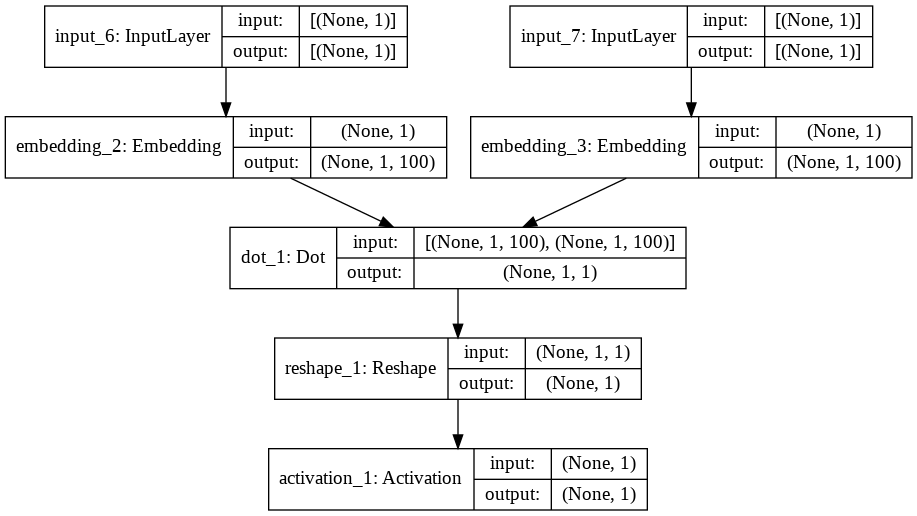

In [ ]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='skip_gram.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4623.3008370772
Epoch : 2 Loss : 3675.1271531600505
Epoch : 3 Loss : 3522.1746307816356
Epoch : 4 Loss : 3321.537118319422
Epoch : 5 Loss : 3096.837727518752


# 3. 결과 확인하기

In [ ]:
import gensim

In [ ]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['disease'])

[('infection', 0.6822181940078735),
 ('patients', 0.6786915063858032),
 ('diseases', 0.6778280138969421),
 ('yeast', 0.637976348400116),
 ('lyme', 0.6234785318374634),
 ('lesions', 0.62334144115448),
 ('treat', 0.6229036450386047),
 ('nerve', 0.6226518750190735),
 ('quack', 0.6102176308631897),
 ('chronic', 0.6035628318786621)]

In [ ]:
w2v.most_similar(positive=['soldiers'])

[('wounded', 0.7870566248893738),
 ('hamas', 0.780727744102478),
 ('slaughter', 0.778682291507721),
 ('massacred', 0.7761104702949524),
 ('palestinians', 0.7727225422859192),
 ('villages', 0.7700804471969604),
 ('shelling', 0.7644733190536499),
 ('occupation', 0.7623903751373291),
 ('terrorist', 0.7594828009605408),
 ('killed', 0.7571672201156616)]

In [ ]:
w2v.most_similar(positive=['police'])

[('officers', 0.5940332412719727),
 ('demand', 0.5538086295127869),
 ('investigation', 0.5475316047668457),
 ('permit', 0.5427597761154175),
 ('homes', 0.5251521468162537),
 ('intifada', 0.5153162479400635),
 ('switzerland', 0.5054680109024048),
 ('handguns', 0.5039469003677368),
 ('funds', 0.49640247225761414),
 ('treasury', 0.49368804693222046)]

In [ ]:
w2v.most_similar(positive=['hero'])

[('evident', 0.6241123676300049),
 ('treasury', 0.622967004776001),
 ('exercised', 0.6084901094436646),
 ('delegated', 0.6084328889846802),
 ('bloodshed', 0.605443000793457),
 ('restitution', 0.6043845415115356),
 ('gross', 0.6000478863716125),
 ('intervened', 0.5970805883407593),
 ('dashnaks', 0.594544529914856),
 ('verbally', 0.594032347202301)]

In [ ]:
w2v.most_similar(positive=['engine'])

[('wheel', 0.5794666409492493),
 ('honda', 0.5051121711730957),
 ('metal', 0.48657843470573425),
 ('pickup', 0.48521116375923157),
 ('smaller', 0.4837951362133026),
 ('front', 0.4800146818161011),
 ('brake', 0.4778139591217041),
 ('steering', 0.4674001634120941),
 ('shafts', 0.46222877502441406),
 ('rebuilt', 0.4620116949081421)]

In [ ]:
w2v.most_similar(positive=['doctor'])

[('pain', 0.6648697853088379),
 ('migraine', 0.632205605506897),
 ('prescription', 0.6129752397537231),
 ('spite', 0.5851105451583862),
 ('doctors', 0.5646334290504456),
 ('disease', 0.5567648410797119),
 ('mild', 0.5515984296798706),
 ('treatment', 0.5462743043899536),
 ('chronic', 0.5447998046875),
 ('quack', 0.5412765741348267)]